In [5]:
import os
import ast

import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

import metaspace
from metaspace import SMInstance

import umap

from viz import get_ds_list, get_ion_imgs, ion_cluster, plot_ion_imgs, label_point, imshow_ions, cluster_viz
from metadata import get_meta_df

import matplotlib.patches as mpatches
plt.rcParams['figure.figsize'] = (13,9)
plt.rcParams['figure.dpi'] = 300

In [2]:
all_df = pd.read_csv('all_df_TF100.csv') # loads already save meta dataframe

In [3]:
vec_file = 'vectors_TheoNo1No2_TF_rw_size100_rw.tsv'
meta_file = 'metadata_TheoNo1No2_TF_rw_size100_rw.tsv'

iv = pd.read_csv(vec_file, sep = '\t', header= None)

vec_names = pd.read_csv(meta_file, sep = '\t', header = None )   # sep '\t' for tsv files

ion_names = vec_names[0].tolist()

In [6]:
reducer = umap.UMAP(metric='cosine')

# Do not scale for the time being, vectors should be scales already
# scaled_vectors = StandardScalar().fit_transform(iv) 
embedding = reducer.fit_transform(iv)

name2x = {name: embedding[i][0] for i, name in enumerate(ion_names)}
name2y = {name: embedding[i][1] for i, name in enumerate(ion_names)}

all_df['umap_x'] = all_df['ion'].map(name2x)
all_df['umap_y'] = all_df['ion'].map(name2y)

In [8]:
# hard coding color palette for dataset coding

pal = sns.color_palette()
color_dict_single = {'whole body xenograft (1) [RMS norm]': pal[0], 'wb xenograft trp pathway dosed- rms_corrected': pal[1], 
                   'whole body xenograft (2) [RMS norm]': pal[2], 'Servier_Ctrl_mouse_wb_lateral_plane_9aa': pal[3], 
                   'Servier_Ctrl_mouse_wb_median_plane_9aa': pal[4],  'Servier_Ctrl_mouse_wb_median_plane_chca' : pal[5],
                   'Servier_Ctrl_mouse_wb_lateral_plane_chca': pal[6], 'Servier_Ctrl_mouse_wb_lateral_plane_DHB': pal[9]}

color_dict_multiple = {'Multiple Datasets':'gray'}

In [9]:
single_ds_df = all_df[all_df['single_dataset_name'] != 'Multiple Datasets']
multiple_ds_df = all_df[all_df['single_dataset_name'] == 'Multiple Datasets'] 

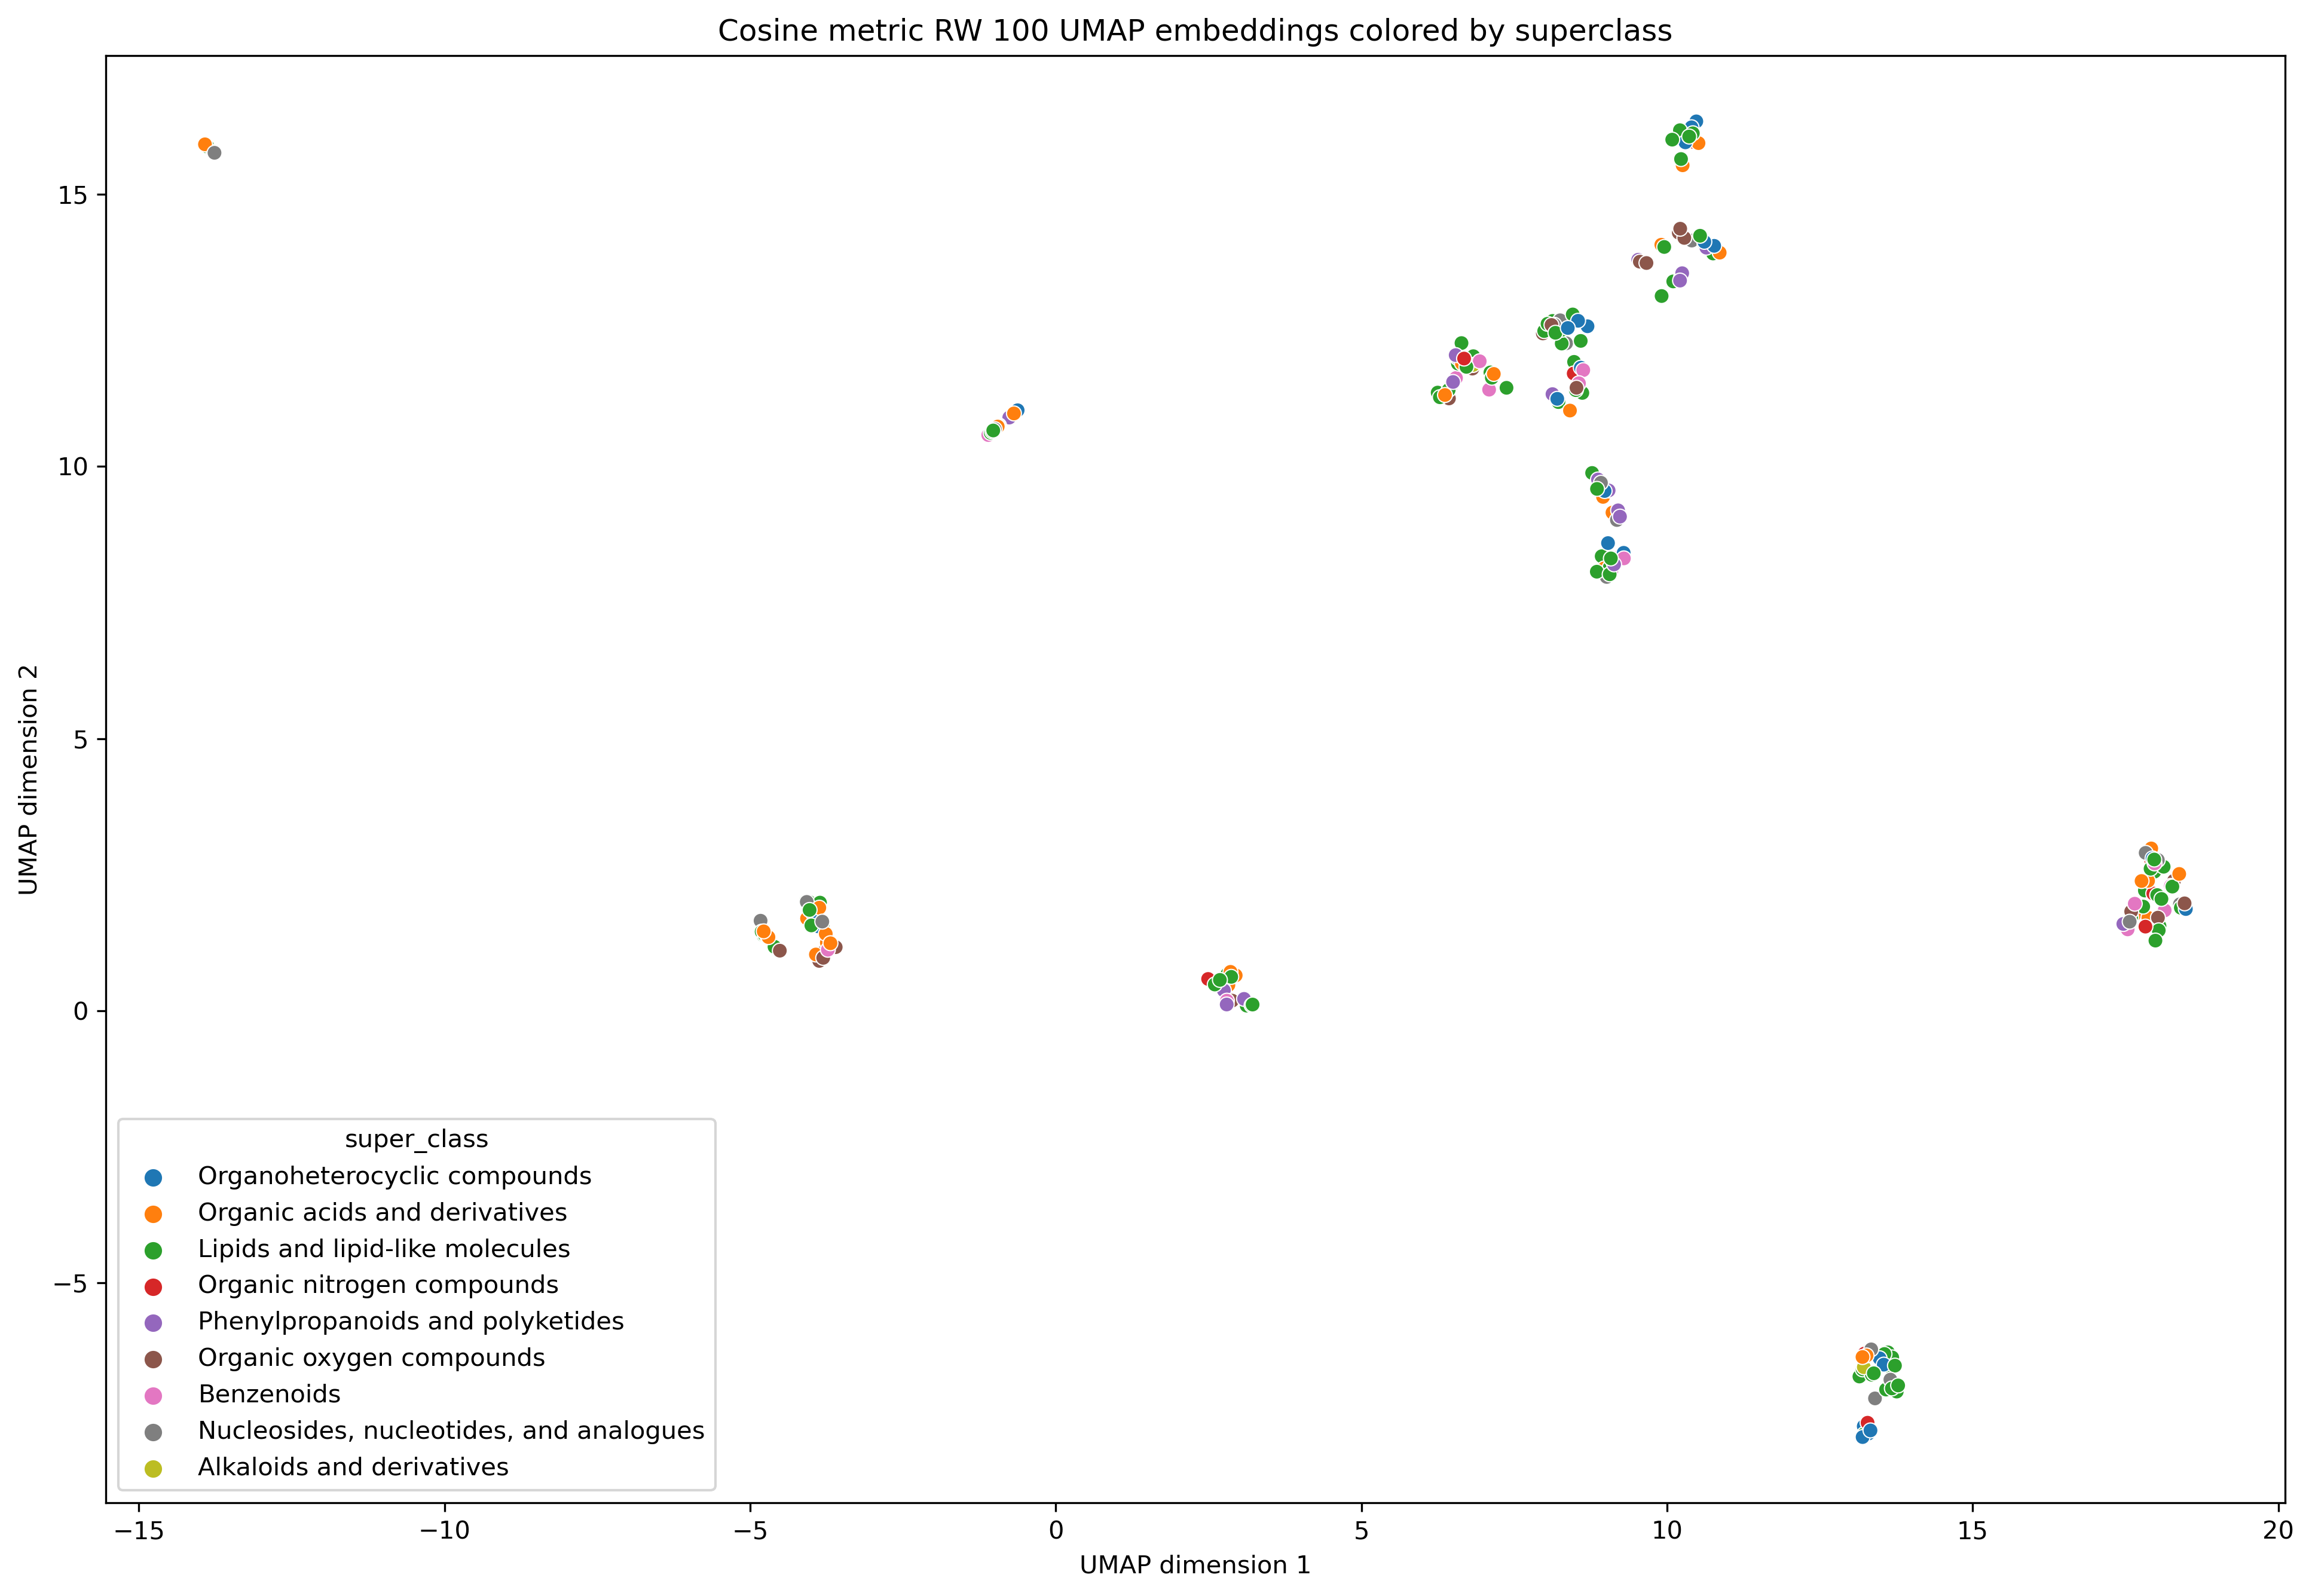

In [10]:
plt.title('Cosine metric RW 100 UMAP embeddings colored by superclass')

ax = sns.scatterplot(data = all_df, x = 'umap_x', y= 'umap_y', hue = 'super_class')
#label_point(all_df.umap_x, all_df.umap_y, all_df.mol_name, plt.gca())
plt.xlabel('UMAP dimension 1')
plt.ylabel('UMAP dimension 2')


left, bottom, width, height = (10.5, 10.6, 2.4, 2.6)
rect=mpatches.Rectangle((left,bottom),width,height, 
                        fill=False,
                        color="purple",
                       linewidth=2)
                       #facecolor="red")
#plt.gca().add_patch(rect)
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig('plots/CosineMetric_RW100_AllData_superclass_colorcoded.png', format='png')

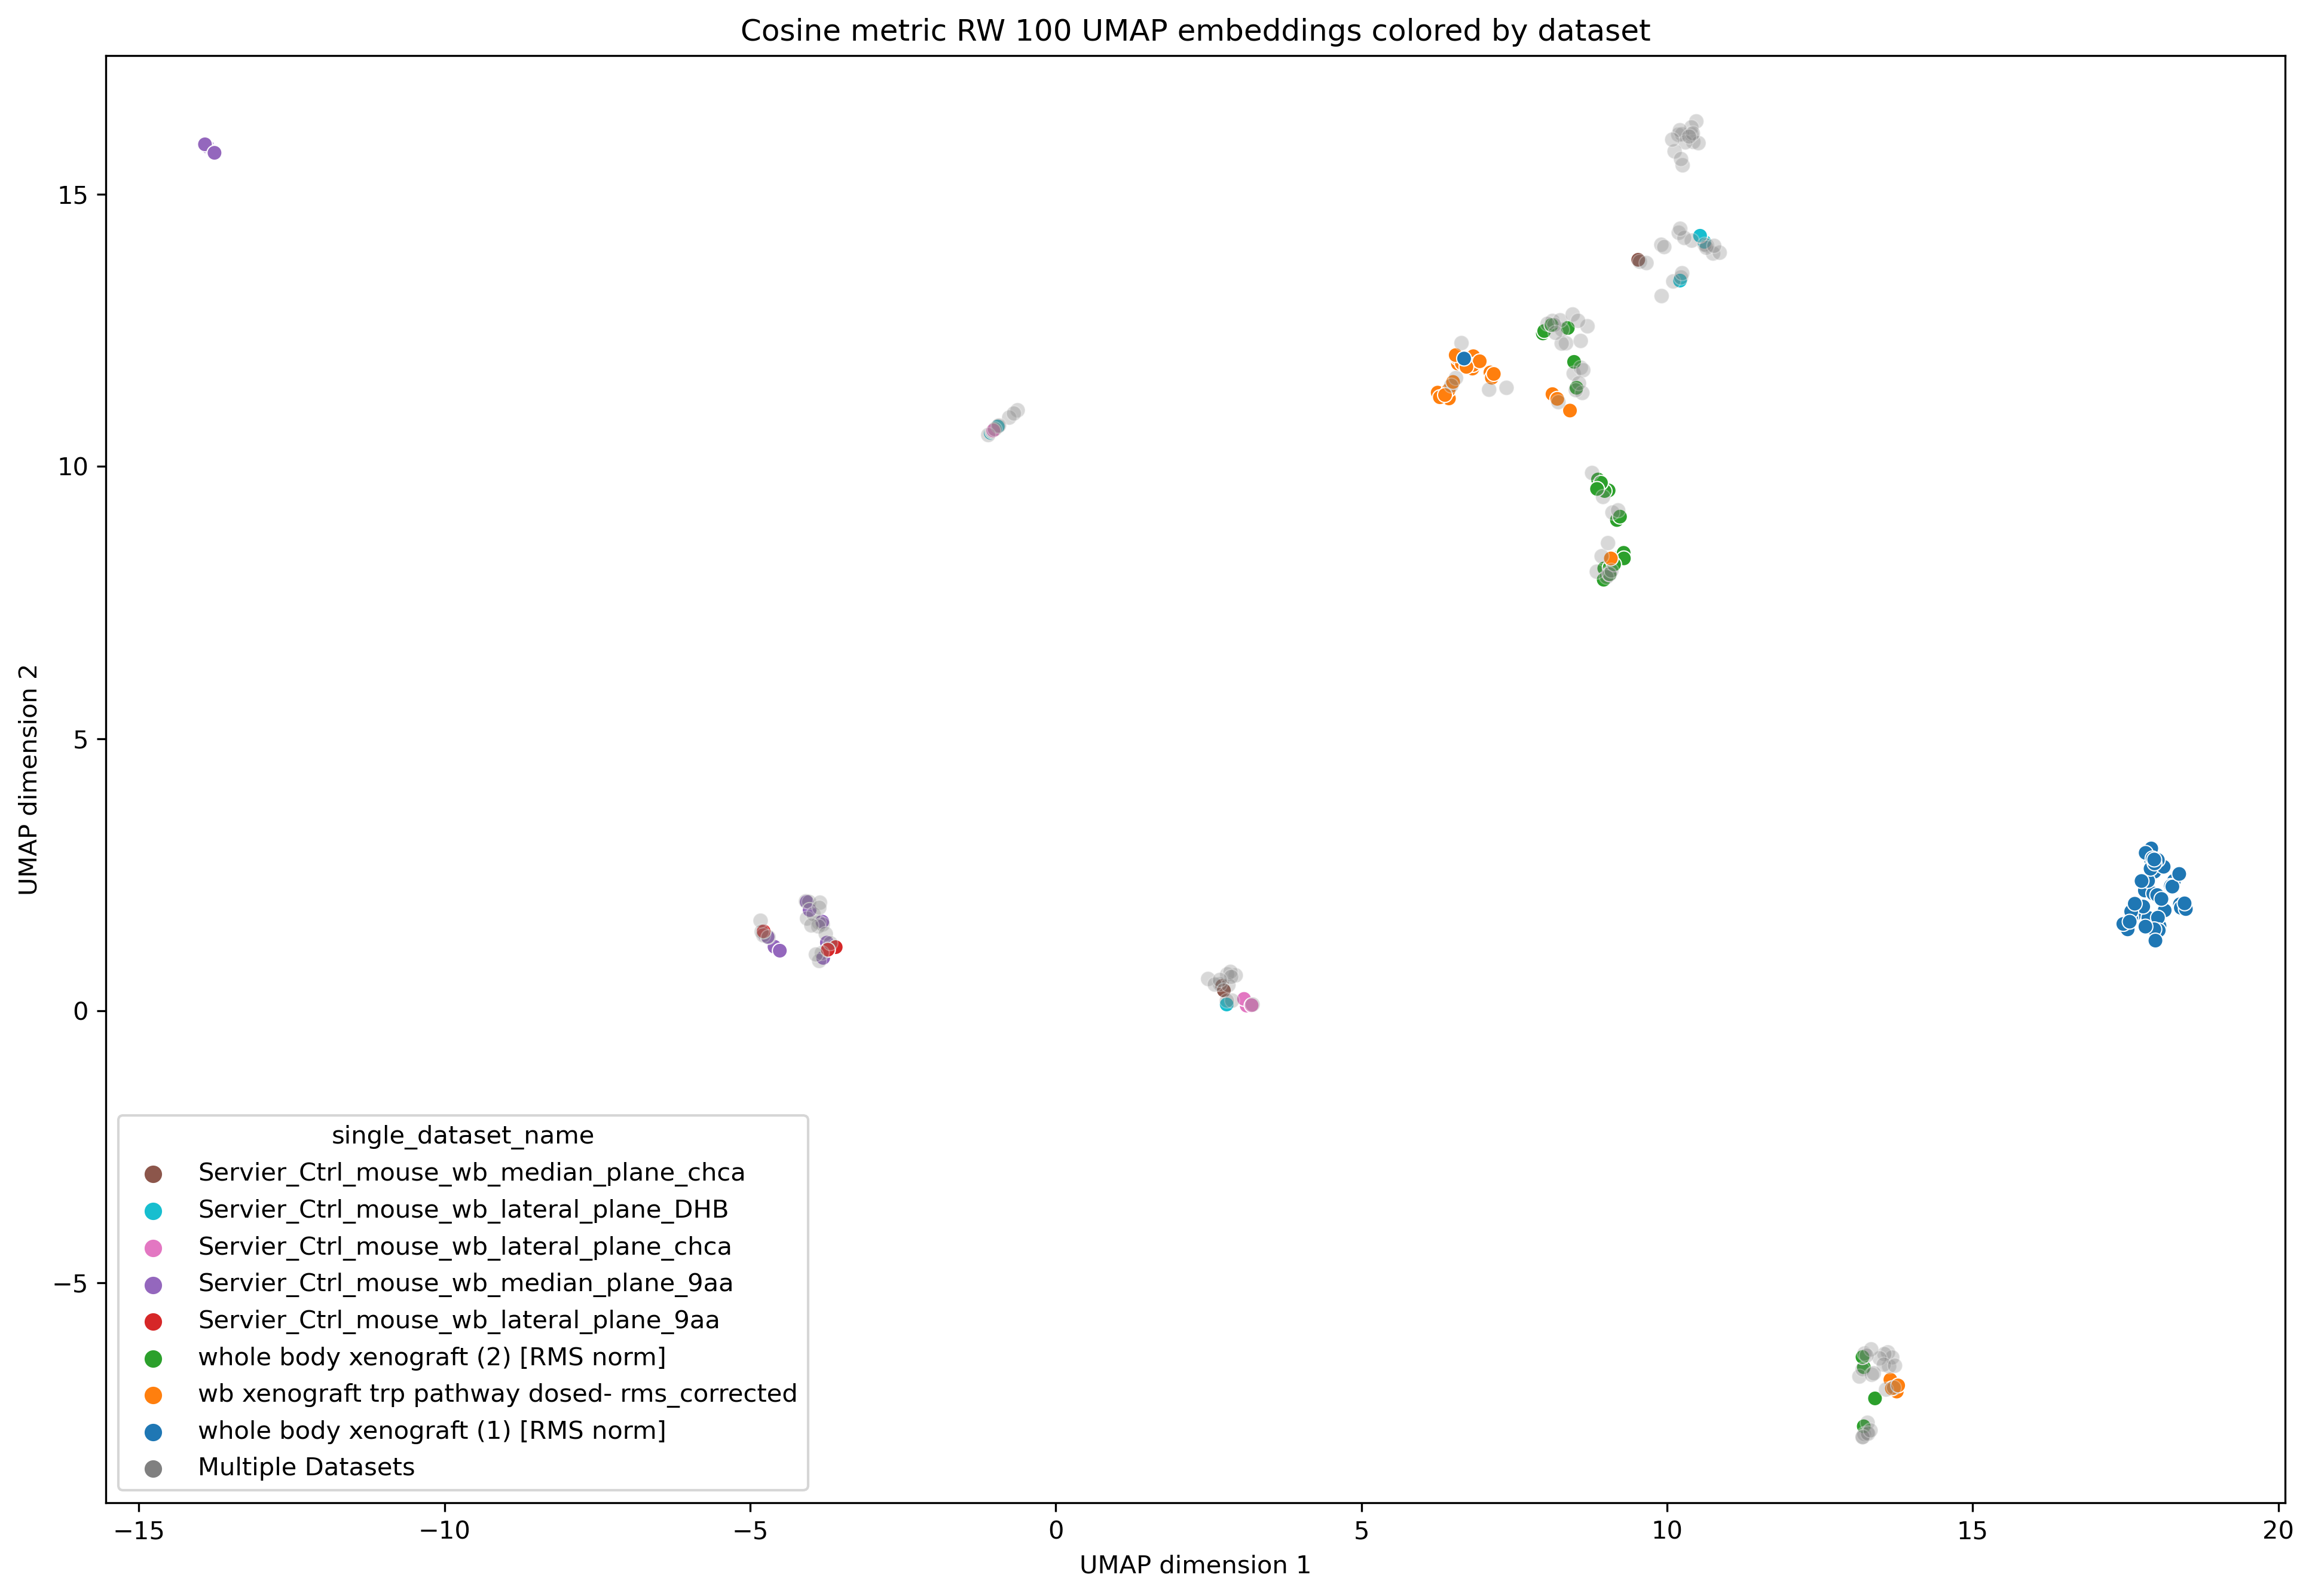

In [11]:
plt.title('Cosine metric RW 100 UMAP embeddings colored by dataset')

ax = sns.scatterplot(data = single_ds_df, x = 'umap_x', y= 'umap_y', hue = 'single_dataset_name', palette = color_dict_single)
sns.scatterplot(data = multiple_ds_df, x = 'umap_x', y='umap_y', hue = 'single_dataset_name', palette = color_dict_multiple, alpha = 0.3)

#label_point(all_df.umap_x, all_df.umap_y, all_df.mol_name, plt.gca())
plt.xlabel('UMAP dimension 1')
plt.ylabel('UMAP dimension 2')


left, bottom, width, height = (10.5, 10.6, 2.4, 2.6)
rect=mpatches.Rectangle((left,bottom),width,height, 
                        fill=False,
                        color="purple",
                       linewidth=2)
                       #facecolor="red")
#plt.gca().add_patch(rect)
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig('plots/CosineMetricRW100_AllData_dataset_colorcoded.png', format='png')